# Вопросы по лекции для закрепления материала

* В чем состоит задача языкового моделирования?
* Как можно использовать n-граммы для языкового моделирования?
* Какие виды токенизации вы знаете?
* Какие стратегии генерации текстов вы помните?

# Установка PyTorch

In [ ]:
# ! pip install torch torchvision torchaudio

См. [здесь](https://pytorch.org/get-started/locally/), как установить PyTorch с поддержкой GPU для различных операционных систем.

### Проверяем, что все работает

In [3]:
import torch

In [2]:
print(torch.tensor([1, 2, 3]))

tensor([1, 2, 3])


# Работа с основными объектами PyTorch

Познакомимся с основными объектами в PyTorch: тензоры, оптимизаторы, модули для создания нейросетей, классы для работы с данными.

## Тензоры

По сути, тензоры - это многомерными массивами. Как вы увидите ниже, работа с тезорами в PyTorch очень похожа на работу с numpy-массивами.

In [3]:
import torch

### Создание тензоров

Создать вектор из данных:

In [4]:
print(torch.tensor([1, 2, 3, 4.5]))

tensor([1.0000, 2.0000, 3.0000, 4.5000])


Создать матрицу из данных:

In [5]:
print(torch.tensor([[1, 2, 3], [4, 5, 6]]))

tensor([[1, 2, 3],
        [4, 5, 6]])


Создать случайную матрицу:

In [6]:
print(torch.rand(5, 6))

tensor([[0.5858, 0.1632, 0.1442, 0.5516, 0.3612, 0.4089],
        [0.0033, 0.5934, 0.1109, 0.9842, 0.0337, 0.8954],
        [0.8843, 0.6390, 0.5203, 0.2810, 0.8716, 0.0942],
        [0.2621, 0.0751, 0.2559, 0.2447, 0.1141, 0.4097],
        [0.0087, 0.7388, 0.7737, 0.5229, 0.2065, 0.8234]])


Создать тензор чисел от 0 до 9 включительно:

In [7]:
print(torch.arange(10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


### Атрибуты тензоров

In [8]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(a)

tensor([[1, 2, 3],
        [4, 5, 6]])


Размерность:

In [9]:
print(a.shape)

torch.Size([2, 3])


Тип данных:

In [10]:
print(a.dtype)

torch.int64


Устройство, на котором расположен тензор:

In [11]:
print(a.device)

cpu


### Преобразования тензоров

In [12]:
A = torch.rand(2, 6)
print(A)

tensor([[0.3445, 0.1136, 0.9097, 0.8621, 0.7495, 0.4584],
        [0.8968, 0.7642, 0.5834, 0.0418, 0.7872, 0.7272]])


Изменить размерность тензора:

In [13]:
print(A.reshape(3, 4))

tensor([[0.3445, 0.1136, 0.9097, 0.8621],
        [0.7495, 0.4584, 0.8968, 0.7642],
        [0.5834, 0.0418, 0.7872, 0.7272]])


Превратить тензор в одномерный массив:

In [14]:
print(A.flatten())

tensor([0.3445, 0.1136, 0.9097, 0.8621, 0.7495, 0.4584, 0.8968, 0.7642, 0.5834,
        0.0418, 0.7872, 0.7272])


Транспонировать матрицу:

In [15]:
print(A.T)

tensor([[0.3445, 0.8968],
        [0.1136, 0.7642],
        [0.9097, 0.5834],
        [0.8621, 0.0418],
        [0.7495, 0.7872],
        [0.4584, 0.7272]])


Для тензоров более высокой размерности нужно указать, какие измерения переставить.

In [16]:
print(A.transpose(0, 1))

tensor([[0.3445, 0.8968],
        [0.1136, 0.7642],
        [0.9097, 0.5834],
        [0.8621, 0.0418],
        [0.7495, 0.7872],
        [0.4584, 0.7272]])


### Операции с тензорами одинаковой размерности

In [17]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([-1, 0, 1])
A = torch.tensor([[ 0, 1, 2], 
                  [-1, 0, 1]])
B = torch.tensor([[1, 2, 3],
                  [7, 0, 5]])
print(a)
print(b)
print(A)
print(B)

tensor([1, 2, 3])
tensor([-1,  0,  1])
tensor([[ 0,  1,  2],
        [-1,  0,  1]])
tensor([[1, 2, 3],
        [7, 0, 5]])


Покомпонентное сложение:

In [18]:
print(a + b)
print(A + B)

tensor([0, 2, 4])
tensor([[1, 3, 5],
        [6, 0, 6]])


Покомпонентное умножение:

In [19]:
print(a * b)
print(A * B)

tensor([-1,  0,  3])
tensor([[ 0,  2,  6],
        [-7,  0,  5]])


Покомпонентное возведение в степень:

In [21]:
print(a**b)
print(A ** B)

tensor([1, 1, 3])
tensor([[ 0,  1,  8],
        [-1,  1,  1]])


Скалярное произведение:

In [22]:
print(a @ b)

tensor(2)


Умножение матрицы на вектор:

In [23]:
print(A @ a)

tensor([8, 2])


### Операции с тензорами разной размерности

In [24]:
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
v_row = torch.tensor([0, 1, 2])
v_col = torch.tensor([[0], [1]])
print(A)
print(v_row)
print(v_col)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([0, 1, 2])
tensor([[0],
        [1]])


Прибавить к каждой строке матрицы один и тот же вектор:

In [25]:
print(A + v_row)

tensor([[1, 3, 5],
        [4, 6, 8]])


Прибавить к каждому столбцу матрицы один и тот же вектор:

In [26]:
print(A + v_col)

tensor([[1, 2, 3],
        [5, 6, 7]])


Это частные случаи [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) (обработка векторов/матриц разной размерности, как в R)

### Автоматическое дифференцирование

![image](img/forward_backward.svg)

In [27]:
x = torch.tensor([-1.0, 3.0, -3.0], requires_grad=True)
c = torch.tensor([0.0, 1.0, 2.0], requires_grad=False)
L = torch.sum((x - c)**2)
print(x)
print(c)
print(L)

tensor([-1.,  3., -3.], requires_grad=True)
tensor([0., 1., 2.])
tensor(30., grad_fn=<SumBackward0>)


Считаем градиент переменной `L` по параметрам `x`:

In [28]:
L.backward()

Градиент по `x`:

In [29]:
print(x.grad)

tensor([ -2.,   4., -10.])


Минимизируем `L` методом [градиентного спуска](https://en.wikipedia.org/wiki/Gradient_descent):

In [30]:
optimizer = torch.optim.SGD(params=[x], lr=0.1)

for _ in range(100):
    optimizer.zero_grad()
    L = torch.sum((x - c)**2)
    L.backward()
    optimizer.step()
    
L = torch.sum((x - c)**2)
    
print(L, x)

tensor(1.1369e-13, grad_fn=<SumBackward0>) tensor([-2.0370e-10,  1.0000e+00,  2.0000e+00], requires_grad=True)


### Упражнение

Найти градиент функции

$$
f(x) = (Ax - b)^2
$$

в точке $x_0 = (1, -1, 0)$, где

$$
A = \begin{pmatrix}
0 & 3 & -1\\
-2 & 2 & 6
\end{pmatrix},
$$

$$
b = \begin{pmatrix}
-1 \\
2
\end{pmatrix}.
$$

Минимизируйте $f$ методом градиентного спуска, укажите полученное значение $x$ и соответствующее значение $f(x)$.

In [36]:
A = torch.tensor([[0., 3., -1.], [-2., 2., 6.]])
b = torch.tensor([-1., 2.])

x = torch.tensor([1., -1., 0.], requires_grad=True)

F = torch.sum((A @ x - b) ** 2)
F.backward()
print(x.grad)

tensor([ 24., -36., -68.])


## Упражнение

Написать нахождение параметров линейной регрессии с использованием `torch`.

In [37]:
n = 500
k = 3

x = torch.randn(n, k)
w_true = torch.Tensor((2., 3., -1.))
b_true = torch.Tensor([5])
y = torch.matmul(x, w_true) + b_true + 0.1 * torch.randn(n)
y

tensor([ 4.8729e+00, -2.7018e+00,  2.0790e+00,  1.2196e+00,  4.0525e+00,
         1.1212e+01,  2.2317e+00,  2.3730e+00,  5.0811e+00,  7.8234e+00,
         5.7934e+00,  8.4682e+00,  8.4895e-01,  4.2631e+00,  1.3401e+00,
         8.8739e+00,  8.2951e+00, -1.0623e+00,  4.2502e+00,  3.3365e+00,
         2.6657e+00,  1.2675e+00,  3.1424e+00,  7.5987e+00, -8.5811e-01,
         2.1326e+00,  6.9270e+00, -3.8141e+00,  1.0622e+01,  8.4615e+00,
         2.6144e+00,  7.0838e+00,  9.7129e+00,  1.1141e-01,  5.9754e+00,
         1.0293e+01,  4.0365e-01,  6.0385e+00,  7.5058e-01,  8.7725e+00,
         5.9385e+00,  3.8583e+00,  6.9038e+00,  9.3190e+00,  5.5917e+00,
         7.0115e+00,  2.0618e+00,  2.5466e+00,  7.4957e+00,  1.0352e+01,
         1.4014e+01,  7.6804e-01,  1.2594e+00, -7.2255e-01,  1.7109e+00,
        -1.6278e+00,  7.5144e+00,  1.0528e+01,  5.0509e+00,  1.0290e+01,
         2.1797e+00,  3.6088e+00,  9.4892e+00,  1.0132e+01,  2.3722e+00,
         1.1651e+01,  5.3299e+00,  2.7888e+00,  2.4

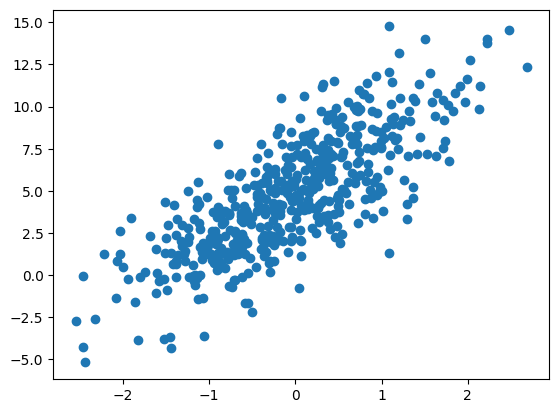

In [38]:
import matplotlib.pyplot as plt

plt.scatter(x.numpy()[:, 1], y.numpy())

In [39]:
epoch = 100
alpha = 0.001
w = torch.randn(k, requires_grad=True)
b = torch.randn(1, requires_grad=True)


for i in range(epoch):
    y_pred = torch.matmul(x, w) + b
    loss = torch.square(y_pred - y).sum()
    loss.backward()

    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

        w.grad = None
        b.grad = None

print(w, b)

tensor([ 1.9994,  3.0137, -0.9921], requires_grad=True) tensor([4.9951], requires_grad=True)


# Работа с torch.nn

В `torch.nn` содержатся компоненты для создания нейросетей (слои, функции потерь, ...).

In [1]:
import torch.nn as nn

Линейный слой:

In [4]:
layer = nn.Linear(5, 3)
print(layer(torch.randn(2, 5)))

tensor([[ 0.2573, -0.0836, -0.3387],
        [ 0.5801, -0.1763, -0.4354]], grad_fn=<AddmmBackward0>)


Функция активации `ReLU`:

In [5]:
layer = nn.ReLU()
print(layer(torch.tensor([[-1.0, 1.0, 2.0, 3.0, -5.0]])))

tensor([[0., 1., 2., 3., 0.]])


Слой `Dropout`:

In [6]:
layer = nn.Dropout(0.5)
print(layer(torch.tensor([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]], dtype=torch.float)))

tensor([[20.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 36.,  0.,  0.]])


Объединяем всё в один пайплайн:

In [7]:
layer = nn.Sequential(
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Dropout(0.5)
)
print(layer(torch.randn((2, 5))))

tensor([[0.0000, 0.0000, 0.0000],
        [1.5080, 1.9621, 3.4101]], grad_fn=<MulBackward0>)


Реализовать свой модуль можно следующим образом:
1) Создать производный от `nn.Module` класс.
2) В методе `__init__` вызвать этот же метод базового класса и определить необходимые элементы.
3) Определить метод `forward` (вычисление итогового результата).

Для примера создадим простую нейросеть, решающую задачу регрессии.

In [22]:
class RegressionModel(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        return self.model(x)

Создаем нейросеть со случайно инициализированными весами:

In [23]:
model = RegressionModel(n_inputs=3)
print(model)

RegressionModel(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)


Применяем нейросеть к случайным входам:

In [24]:
inputs = torch.randn((16, 3))
outputs = model(inputs)
print(inputs)
print(outputs)

tensor([[ 0.7296, -1.0454,  0.3090],
        [-0.0658, -2.6463,  0.0316],
        [-1.2068, -0.7984,  0.1559],
        [ 0.1014,  0.8599, -0.2338],
        [-0.2025, -2.0276, -0.1365],
        [-0.2919, -1.2316, -0.4288],
        [ 0.4845, -0.4794, -0.9179],
        [ 0.4688,  1.5129, -0.9368],
        [-1.8604,  0.1776,  0.0824],
        [ 2.3129, -0.6474,  1.0686],
        [ 1.2149,  1.8274,  0.2876],
        [-0.8707, -1.7481, -1.0510],
        [-1.1926, -0.8679,  1.2396],
        [-0.4897,  1.4089, -0.3457],
        [-1.5498, -0.5194, -0.6987],
        [ 0.3743,  0.3216, -0.3111]])
tensor([[ 0.0685],
        [ 0.1969],
        [ 0.1694],
        [-0.0987],
        [ 0.1148],
        [-0.0526],
        [-0.0934],
        [ 0.2322],
        [ 0.4933],
        [-0.1228],
        [ 0.3234],
        [ 0.3106],
        [ 0.2716],
        [ 0.2951],
        [ 0.1271],
        [ 0.1640]], grad_fn=<AddmmBackward0>)


### Упражнение

Реализовать нейросеть, которая решает многоклассовую задачу классификации.

In [ ]:
class ClassificationModel(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        <YOUR CODE HERE>

    def forward(self, x):
        return <YOUR CODE HERE>

In [40]:
class ClassificationModel(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, n_outputs),
            nn.Softmax(1)
        )

    def forward(self, x):
        output = self.model(x)
        return torch.argmax(output, dim=1)

In [41]:
model = ClassificationModel(n_inputs=3, n_outputs=5)
print(model)

ClassificationModel(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=64, out_features=5, bias=True)
    (7): Softmax(dim=1)
  )
)


In [42]:
inputs = torch.randn((16, 3))
outputs = model(inputs)
print(inputs)
print(outputs)

tensor([[-3.9251e-01, -1.5750e-01,  1.1435e-01],
        [ 6.3960e-02,  1.2089e+00,  8.7132e-01],
        [ 4.3635e-02,  3.1442e-01,  1.4202e+00],
        [-4.8639e-01,  4.7162e-01, -1.6103e+00],
        [ 3.1659e-01,  4.2536e-01, -9.9304e-01],
        [-9.6374e-01,  1.5796e-03, -5.6990e-01],
        [-8.9422e-01,  3.2423e-01, -1.2441e+00],
        [-2.3032e-01,  1.8327e+00, -1.4124e+00],
        [ 5.0953e-01, -5.0468e-01, -4.7310e-01],
        [-8.3333e-01, -2.0512e+00, -1.3248e+00],
        [ 1.6484e-01,  1.2144e+00,  5.6695e-01],
        [-2.0950e-01, -1.1966e+00, -1.8043e+00],
        [-5.2087e-01, -7.8527e-01,  1.7400e-01],
        [ 1.0820e+00,  8.0497e-01,  2.6664e-01],
        [ 7.7500e-01, -2.7228e-01, -4.9975e-01],
        [-1.3174e+00,  1.1234e-01,  9.2566e-01]])
tensor([1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 3, 0, 1, 0, 2, 3])


# Работа с данными

In [11]:
import pandas as pd
import numpy as np

Загрузим классический датасет ["Ирисы Фишера"](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [12]:
df = pd.read_csv('data/Iris.csv').sample(frac=1, random_state=42, ignore_index=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,74,6.1,2.8,4.7,1.2,Iris-versicolor
1,19,5.7,3.8,1.7,0.3,Iris-setosa
2,119,7.7,2.6,6.9,2.3,Iris-virginica
3,79,6.0,2.9,4.5,1.5,Iris-versicolor
4,77,6.8,2.8,4.8,1.4,Iris-versicolor


Размеры датасета:

In [13]:
print(df.shape)

(150, 6)


Распределение классов:

In [14]:
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: count, dtype: int64

Получим матрицу признаков `X` и вектор ответов `y`. При обучении мы можем оперировать только с числами, поэтому закодируем каждый класс числом (0, 1, 2).

In [15]:
def preprocess(df):
    X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values.astype(np.float32)
    y = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values
    return X, y

In [16]:
X, y = preprocess(df)
X_train, y_train = X[:50], y[:50]
X_valid, y_valid = X[50:100], y[50:100]
X_test, y_test = X[100:150], y[100:150]

In [17]:
print(X[0], y[0])

[6.1 2.8 4.7 1.2] 1


Для того, чтобы удобно обучать нейросети с помощью PyTorch, в нем реализованы два класса работы с данными: `Dataset`, `DataLoader`.

In [18]:
from torch.utils.data import Dataset, DataLoader

### Упражнение

1) Создайте класс `MyDataset` -- потомок класс Dataset. 
2) Реализуйте метод `__getitem__`, который принимает индекс элемента и возвращает пару (x, y)
3) Реализуйте медов `__len__`, который возвращает размер датасета

In [ ]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __getitem__(self, idx):
        return <YOUR CODE HERE>
    
    def __len__(self):
        return <YOUR CODE HERE>

In [ ]:
train_dataset = MyDataset(X_train, y_train)
valid_dataset = MyDataset(X_valid, y_valid)
test_dataset = MyDataset(X_test, y_test)

Посмотрим, что можно делать с датасетами. Мы можем получить его размер с помощью len(...). Для этого мы реализовали метод `__len__`:

In [ ]:
print(len(train_dataset))

Мы также можем обращаться к массиву, используя различные виды индексирования:

In [ ]:
x, y = train_dataset[0]
print(x, y)

In [ ]:
X_batch, y_batch = train_dataset[:5]
print(X_batch)
print(y_batch)

In [ ]:
X_batch, y_batch = train_dataset[[0, 2, 5]]
print(X_batch)
print(y_batch)

Класс `DataLoader` нужен для автоматического формирования батчей для заданного датасета. 

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, drop_last=True)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True, drop_last=True)

In [ ]:
batches = [x for x in train_loader]
print(len(batches))
print(batches[0])
print(batches[1])

# Обучение модели

In [ ]:
import random
import numpy as np
from tqdm import tqdm

Сделаем эксперименты воспроизводимыми

In [ ]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

Зададим параметры обучения

In [ ]:
# Количество эпох (полных проходов по датасету)
n_epochs = 128

# Размерность входа
n_inputs = 4

# Размерность выхода (кол-во классов)
n_outputs = 3

# Скорость обучения (learning rate)
lr = 1e-3

Инициализируем модель, функцию потерь и оптимизатор

In [ ]:
model = ClassificationModel(n_inputs=n_inputs, n_outputs=n_outputs)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)

Реализуем вычисление потерь на валидационном датасете

In [ ]:
def compute_validation_loss(model, loader, loss_func):
    loss = 0
    # Используем нейросеть в режиме применения (отключаем Dropout, ...)
    model.eval()
    for x, y in loader:
        # Нам не нужно вычислять градиенты, поэтому можно сэкономить память
        with torch.no_grad():
            logits = <YOUR CODE HERE>
        loss += loss_func(<YOUR CODE HERE>).item() / len(loader)
    return loss

Реализуем цикл обучения нейросети (внешний цикл по эпохам, а внутренний -- по батчам). В конце каждой эпохи будем считать потери на валидационном датасете.

In [ ]:
for i in range(1, n_epochs + 1):
    print(f'Epoch {i}')
    for x, y in tqdm(train_loader):
        # Переводим модель в режим обучения (включаем Dropout, ...)
        model.train()
        logits = <YOUR CODE HERE>
        loss = loss_func(<YOUR CODE HERE>)
        # Сбрасываем градиенты (.backward() только прибавляет новые градиенты к текущим)
        optimizer.zero_grad()
        # Вычисляем градиенты
        loss.backward()
        # Обновляем параметры нейросети
        optimizer.step()
    # Считаем и выводим потери на валидационном датасете
    eval_loss = compute_validation_loss(model, valid_loader, loss_func)
    print(f'train_loss={loss.item()}, eval_loss={eval_loss}')